In [1]:
#모듈import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import files
upload = files.upload()
#df=pd.read_csv('InsuranceData.csv')
df = pd.read_csv('InsuranceData.csv')

Saving InsuranceData.csv to InsuranceData.csv


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:
df['SIU_CUST_YN'].replace('N', 0, inplace = True)
df['SIU_CUST_YN'].replace('Y', 1, inplace = True)
df['FP_CAREER'].replace('N', 0, inplace = True)
df['FP_CAREER'].replace('Y', 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7626 entries, 0 to 7625
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   SIU_CUST_YN           7626 non-null   int64
 1   SEX                   7626 non-null   int64
 2   AGE                   7626 non-null   int64
 3   FP_CAREER             7626 non-null   int64
 4   OCCP_GRP              7626 non-null   int64
 5   TOTALPREM             7626 non-null   int64
 6   MAIN_INSR_AMT_SUM     7626 non-null   int64
 7   WORK_YEARS_MIN        7626 non-null   int64
 8   EXPR_COUNT            7626 non-null   int64
 9   DMND_AMT_SUM          7626 non-null   int64
 10  CLAIM_CNT             7626 non-null   int64
 11  TOTAL_VLID_HOSP_OTDA  7626 non-null   int64
 12  HOSP_VARIES           7626 non-null   int64
 13  HOSP_DVSN_VARIES      7626 non-null   int64
 14  CHME_LICE_COUNT       7626 non-null   int64
dtypes: int64(15)
memory usage: 893.8 KB


In [6]:
#특성 변수 분류
X= df.iloc[:,1:]
y= df.iloc[:,0]

#train과 test데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5338, 14) (2288, 14) (5338,) (2288,)


In [7]:
#smote를 활용한 데이터 불균형 처리
SMOTE=SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
model=RandomForestClassifier()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

ROC AUC score for oversampled SMOTE data:  0.7511494855859137


In [10]:

print('accuracy: %.2f' % accuracy_score(y_test, pred_SMOTE))
print('precision: %.2f' % precision_score(y_test, pred_SMOTE))
print('recall: %.2f' % recall_score(y_test, pred_SMOTE))
print('F1: %.2f' % f1_score(y_test, pred_SMOTE))

accuracy: 0.88
precision: 0.43
recall: 0.59
F1: 0.50


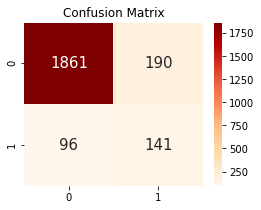

In [11]:
confusion = confusion_matrix(y_true = y_test, y_pred = pred_SMOTE)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()